In [3]:
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import sklearn
import sklearn.datasets
import scipy
from PIL import Image
from scipy import ndimage
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Activation
%matplotlib inline


In [13]:
np.random.seed(7)
np.random.rand(4)

array([0.07630829, 0.77991879, 0.43840923, 0.72346518])

In [18]:
def load_data():
    f=gzip.open('mnist.pkl.gz','rb')
    f.seek(0)
    training_data,validation_data,test_data=pickle.load(f,encoding='latin1')
    f.close()
    return (training_data,validation_data,test_data)

In [19]:
#loading data
training_data,validation_data,test_data=load_data()

In [65]:
np.array(training_data[0][:]).T

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
len(test_data[0])

10000

In [43]:
len(validation_data[0])

10000

In [44]:
# we need to convert target variable to one hot matrix
def one_hot(j):
    n=j.shape[0]
    new_array=np.zeros((10,n))
    index=0
    for res in j:
        new_array[res][index]=1.0
        index=index+1
    return new_array

In [47]:
data=np.array(range(10))
one_hot(data)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [54]:
training_data[0].shape

(50000, 784)

In [83]:
def data_wrapper():
    tr_d,va_d,te_d=load_data()
    training_inputs=np.array(tr_d[0][:]).T
    training_results=np.array(tr_d[1][:])
    train_set_y=one_hot(training_results)
    
    validation_inputs=np.array(va_d[0][:]).T
    validation_results=np.array(va_d[1][:])
    validation_set_y=one_hot(validation_results)
    
    test_inputs=np.array(te_d[0][:]).T
    test_results=np.array(te_d[1][:])
    test_set_y=one_hot(test_results)
    
    return (training_inputs , train_set_y, validation_inputs, validation_set_y)

In [84]:
train_set_x,train_set_y,test_set_x,test_set_y = data_wrapper()

For implementing in Keras, the input training and input target dataset are supposed to have shape (m, n) where m is the number of training samples and n is the number of parts in a single input.
<br> Hence, let create the desired dataset shapes by taking transpose.

In [85]:
train_set_x=train_set_x.T
train_set_y=train_set_y.T
test_set_x=test_set_x.T
test_set_y=test_set_y.T

In [89]:
# leprint ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))



train_set_x shape: (50000, 784)
train_set_y shape: (50000, 10)
test_set_x shape: (10000, 784)
test_set_y shape: (10000, 10)


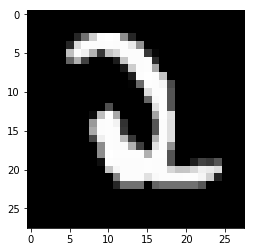

In [98]:
index=400
k=train_set_x[index,:]
k=k.reshape((28,28))
plt.imshow(k, cmap='gray')

In [99]:
# create model
nn_model=Sequential()
nn_model.add(Dense(35,input_dim=784,activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(21,activation='relu'))
nn_model.add(Dense(10,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Before we run the model on the training datasets, we compile the model in which we define various things like loss function,the optimizer and the evaluation metric

In [100]:
nn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Now to fit the model on the trainig input and training target dataset, we run the following command using a minibatch of size 10 and 10 epochs

In [103]:
nn_model.fit(train_set_x,train_set_y,epochs=7,batch_size=10)

Epoch 1/7
50000/50000 [==============================] - 7s 134us/step - loss: 0.1781 - acc: 0.9448
Epoch 2/7
50000/50000 [==============================] - 7s 135us/step - loss: 0.1773 - acc: 0.9431
Epoch 3/7
50000/50000 [==============================] - 7s 132us/step - loss: 0.1729 - acc: 0.9450
Epoch 4/7
50000/50000 [==============================] - 7s 133us/step - loss: 0.1741 - acc: 0.9443
Epoch 5/7
50000/50000 [==============================] - 7s 133us/step - loss: 0.1726 - acc: 0.9439
Epoch 6/7
50000/50000 [==============================] - 7s 134us/step - loss: 0.1703 - acc: 0.9451
Epoch 7/7
50000/50000 [==============================] - 7s 133us/step - loss: 0.1705 - acc: 0.9448


In [107]:
scores_train=nn_model.evaluate(train_set_x,train_set_y)
print(nn_model.metrics_names[1],scores_train[1]*100)

50000/50000 [==============================] - 1s 20us/step
acc 97.932


In [110]:
predictions=nn_model.predict(test_set_x)
predictions=np.argmax(predictions,axis=1)
predictions

array([3, 8, 6, ..., 5, 6, 8], dtype=int64)

In [112]:
scores_test=nn_model.evaluate(test_set_x,test_set_y)
print(nn_model.metrics_names[1],scores_test[1]*100)

10000/10000 [==============================] - 0s 23us/step
acc 96.89999999999999
